# Step 0.0. Install LightAutoML

In [4]:
!pip install -U lightautoml

  Using cached importlib_metadata-1.7.0-py2.py3-none-any.whl (31 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.2.0
    Uninstalling importlib-metadata-4.2.0:
      Successfully uninstalled importlib-metadata-4.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
virtualenv 20.17.1 requires importlib-metadata>=4.8.3; python_version < "3.8", but you have importlib-metadata 1.7.0 which is incompatible.
pynndescent 0.5.8 requires importlib-metadata>=4.8.1; python_version < "3.8", but you have importlib-metadata 1.7.0 which is incompatible.
pydocstyle 6.3.0 requires importlib-metadata<5.0.0,>=2.0.0; python_version < "3.8", but you have importlib-metadata 1.7.0 which is incompatible.
nbformat 5.7.3 requires importlib-metadata>=3.6; python_version < "3.8", but you have importlib-metadata 1.7.0 which is incompatible

# Step 0.1. Import necessary libraries 

In [5]:
# Standard python libraries
import logging
import os
import time
import requests
logging.basicConfig(format='[%(asctime)s] (%(levelname)s): %(message)s', level=logging.INFO)

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task

# Step 0.2. Parameters 

In [3]:
N_THREADS = 4 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 600 # Time in seconds for automl run
TARGET_NAME = 'final_price' # Target column name

# Step 0.3. Data load 

In [4]:
%%time

train_data = pd.read_csv('../input/lightautomlcourse-hw1/train_data.csv')
train_data.head()

CPU times: user 92.1 ms, sys: 23.5 ms, total: 116 ms

Wall time: 194 ms


,row_ID,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
0,0,TOYOTA,Aqua s,Sedan,133000,2014,Automatic,4/5,Right-hand drive,Silver,Black,NaN,0,For Sale,3650.0
1,1,MERCEDES-BENZ,C 220,Sedan,24500,2010,Manual,4/5,Left wheel,Silver,Black,NaN,0,For Sale,6800.0
2,2,HYUNDAI,Veloster,Hatchback,31000,2016,Tiptronic,2/3,Left wheel,Silver,Black,KMHTC6AE3GU293912,1,For Sale,6300.0
3,3,HYUNDAI,Santa FE,Jeep,115459,2015,Automatic,4/5,Left wheel,Blue,Black,NaN,1,For Sale,14488.0
4,4,TOYOTA,CHR,Jeep,18950,2019,Automatic,4/5,Left wheel,Black,NaN,JTNKHMBX7K1030253,1,For Sale,5000.0


In [5]:
test_data = pd.read_csv('../input/lightautomlcourse-hw1/test_data.csv')
test_data.head()

,row_ID,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type
0,35000,TOYOTA,Prius,Hatchback,323733,2012,Automatic,4/5,Left wheel,Grey,Black,JTDKN3DU6C5439638,1,For Sale
1,35001,HYUNDAI,Elantra,Sedan,112000,2013,Tiptronic,4/5,Left wheel,Grey,Black,SURATSHIA,1,For Sale
2,35002,LEXUS,NX 300,Jeep,16920,2018,Automatic,NaN,Left wheel,Brown,NaN,JTJYARBZ5J2104521,1,For Sale
3,35003,LEXUS,CT 200h,Hatchback,302742,2012,Automatic,4/5,Left wheel,White,NaN,JTHKD5BH4C2070945,1,For Sale
4,35004,TOYOTA,RAV 4,Jeep,1800,2002,Manual,4/5,Left wheel,Silver,Black,NaN,0,For Sale


In [6]:
submission = pd.read_csv('../input/lightautomlcourse-hw1/sample_submission.csv')
submission.head()

,row_ID,final_price
0,35000,0
1,35001,0
2,35002,0
3,35003,0
4,35004,0


# Step 0.4. Some user feature preparation 

Be creative :)

In [7]:
%%time

def create_expert_feats(data):
    pass

create_expert_feats(train_data)
create_expert_feats(test_data)

CPU times: user 25 µs, sys: 5 µs, total: 30 µs

Wall time: 34.6 µs


In [8]:
train_data.head()

,row_ID,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
0,0,TOYOTA,Aqua s,Sedan,133000,2014,Automatic,4/5,Right-hand drive,Silver,Black,NaN,0,For Sale,3650.0
1,1,MERCEDES-BENZ,C 220,Sedan,24500,2010,Manual,4/5,Left wheel,Silver,Black,NaN,0,For Sale,6800.0
2,2,HYUNDAI,Veloster,Hatchback,31000,2016,Tiptronic,2/3,Left wheel,Silver,Black,KMHTC6AE3GU293912,1,For Sale,6300.0
3,3,HYUNDAI,Santa FE,Jeep,115459,2015,Automatic,4/5,Left wheel,Blue,Black,NaN,1,For Sale,14488.0
4,4,TOYOTA,CHR,Jeep,18950,2019,Automatic,4/5,Left wheel,Black,NaN,JTNKHMBX7K1030253,1,For Sale,5000.0


# ========= AutoML preset usage =========


## Step 1. Create Task

In [9]:
%%time

task = Task('reg', )

CPU times: user 1.69 ms, sys: 0 ns, total: 1.69 ms

Wall time: 1.7 ms


## Step 2. Setup columns roles

Roles setup here set target column and base date, which is used to calculate date differences:

In [10]:
%%time

roles = {'target': TARGET_NAME,
         'drop': ['row_ID'] # to drop or not to drop?
         }

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs

Wall time: 7.63 µs


## Step 3. Create AutoML from preset

To create AutoML model here we use `TabularAutoML` preset, which looks like:

![TabularAutoML preset pipeline](https://github.com/sberbank-ai-lab/LightAutoML/raw/master/imgs/tutorial_2_pipeline.png)

All params we set above can be send inside preset to change its configuration:

In [11]:
%%time 

automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS, 'cv': N_FOLDS, 'random_state': RANDOM_STATE},
                      )
oof_pred = automl.fit_predict(train_data, roles = roles)
logging.info('oof_pred:\n{}\nShape = {}'.format(oof_pred, oof_pred.shape))

Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer


Start automl preset with listed constraints:

- time: 600 seconds

- cpus: 4 cores

- memory: 16 gb



Train data shape: (35000, 15)

Feats was rejected during automatic roles guess: []





Layer 1 ...

Train process start. Time left 561.2757837772369 secs

Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...



===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====



Linear model: C = 1e-05 score = -6356868728.802106

Linear model: C = 5e-05 score = -6356868617.6572485

Linear model: C = 0.0001 score = -6353165439.273258

Linear model: C = 0.0005 score = -6353165417.736182

Linear model: C = 0.001 score = -6353165396.713363

Linear model: C = 0.005 score = -6353165377.034885

Linear model: C = 0.01 score = -6353165354.036336

Linear model: C = 0.05 score = -6353165334.654441

Linear model: C = 0.1 score = -6353165311.525999

Linear model: C = 0.5 score = -6353165289.938826

Linear model: C = 1 score = -6353165271.042661

Linear model: C = 5 score = -6353165249.451816

Linear

CPU times: user 73.7 ms, sys: 4.99 ms, total: 78.7 ms

Wall time: 90.1 ms


<AxesSubplot:xlabel='Feature'>

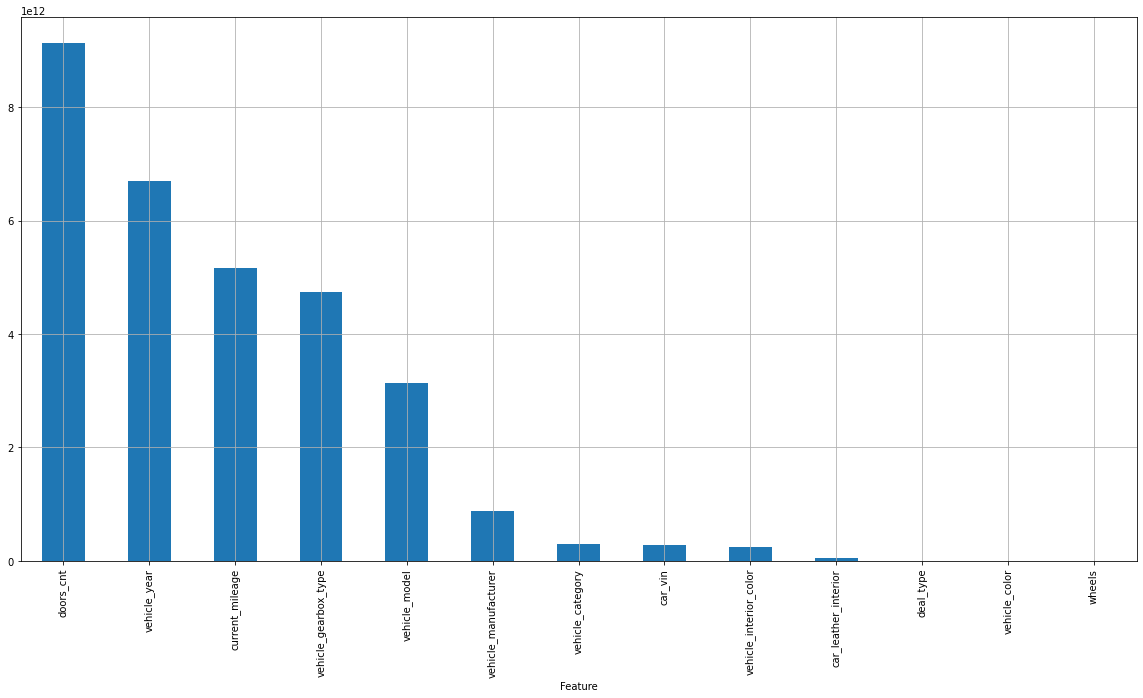

In [12]:
%%time

# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

## Step 4. Predict to test data and check scores

In [13]:
%%time

test_pred = automl.predict(test_data)
logging.info('Prediction for test data:\n{}\nShape = {}'
              .format(test_pred, test_pred.shape))

logging.info('Check scores...')
logging.info('OOF score: {}'.format(mean_absolute_error(train_data[TARGET_NAME].values, oof_pred.data[:, 0])))

CPU times: user 1.39 s, sys: 1.82 ms, total: 1.4 s

Wall time: 1.02 s


## Step 5. Generate submission

In [14]:
submission[TARGET_NAME] = test_pred.data[:, 0]
submission.head()

,row_ID,final_price
0,35000,3439.527344
1,35001,8168.751465
2,35002,6803.220215
3,35003,5390.596680
4,35004,7207.271484


In [15]:
submission.to_csv('lightautoml_sample_submission.csv', index = False)